In [1]:
import pandas as pd
import quapy as qp
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from math import log
import matplotlib.pyplot as plt

# Distance Functions

In [2]:
def HellingerDistance(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q))**2))

In [3]:
def smoothed_hd(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = (p[i]+0.001)/(p.sum()+0.001*len(p))  # take the smoothing factor as 0.001
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = (q[i]+0.001)/(q.sum()+0.001*len(q))
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    return np.sqrt(np.sum((np.sqrt(smoothed_p) - np.sqrt(smoothed_q))**2))

In [4]:
def smoothed_hd2(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        if i==0 and int(p[i])==0:
            smoothed_pi = p[i+1]/2
            smoothed_p.append(smoothed_pi)
        elif i==(len(p)-1) and int(p[i])==0:
            smoothed_pi = p[i-1]/2
            smoothed_p.append(smoothed_pi)
        elif int(p[i])==0:
            smoothed_pi = (p[i-1]+p[i+1])/2
            smoothed_p.append(smoothed_pi)
        else:
            smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        if i==0 and int(q[i])==0:
            smoothed_qi = q[i+1]/2
            smoothed_q.append(smoothed_qi)
        elif i==(len(q)-1) and int(q[i])==0:
            smoothed_qi = q[i-1]/2
            smoothed_q.append(smoothed_qi)
        elif int(q[i])==0:
            smoothed_qi = (q[i-1]+q[i+1])/2
            smoothed_q.append(smoothed_qi)
        else:
            smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    return np.sqrt(np.sum((np.sqrt(smoothed_p) - np.sqrt(smoothed_q))**2))

In [5]:
def Topsoe(p, q):
    smoothed_pl = []
    smoothed_ql = []
    for i in range(len(p)):
        smoothed_pi = (p[i]+0.001)/(p.sum()+0.001*len(p))
        smoothed_pl.append(smoothed_pi)
    smoothed_p = np.array(smoothed_pl)
    for i in range(len(q)):
        smoothed_qi = (q[i]+0.001)/(q.sum()+0.001*len(q))
        smoothed_ql.append(smoothed_qi)
    smoothed_q = np.array(smoothed_ql)
    
    s = 0
    for i in range(len(p)):
        s_i = (smoothed_p[i]*log(2*smoothed_p[i]/(smoothed_p[i]+smoothed_q[i])))
        +(smoothed_q[i]*log(2*smoothed_q[i]/(smoothed_p[i]+smoothed_q[i])))
        s = s + s_i
    return s

In [6]:
def topsoe2(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = p[i]+0.001
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = q[i]+0.001
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    s = 0
    for i in range(len(p)):
        s_i = (smoothed_p[i]*log(2*smoothed_p[i]/(smoothed_p[i]+smoothed_q[i])))
        +(smoothed_q[i]*log(2*smoothed_q[i]/(smoothed_p[i]+smoothed_q[i])))
        s = s + s_i
    return s

In [7]:
def JensenDifference(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = p[i]+0.001
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = q[i]+0.001
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    smoothed_s = 0
    for i in range(len(p)):
        smoothed_s_i = (smoothed_p[i]*log(smoothed_p[i])+smoothed_q[i]*log(smoothed_q[i]))/2 
        - ((smoothed_p[i]+smoothed_q[i])/2*log((smoothed_p[i]+smoothed_q[i])/2))
        smoothed_s = smoothed_s + smoothed_s_i
    print(smoothed_s)
    return smoothed_s

In [8]:
def ProbabilisticSymetric(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = (p[i]+0.001)/(p.sum()+0.001*len(p))
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = (q[i]+0.001)/(q.sum()+0.001*len(q))
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    s = 0
    for i in range(len(p)):
        s_i = (smoothed_p[i]-smoothed_q[i])**2/(smoothed_p[i]+smoothed_q[i])
        s = s + s_i
    return 2*s

In [9]:
def ps2(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = p[i]+0.001
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = q[i]+0.001
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    s = 0
    for i in range(len(p)):
        s_i = (smoothed_p[i]-smoothed_q[i])**2/(smoothed_p[i]+smoothed_q[i])
        s = s + s_i
    return 2*s

In [10]:
def ORD(p, q):
    diffsum = 0
    total_cost = 0
    for i in range(len(p)):
        diffsum = diffsum + (p[i]-q[i])
        total_cost = total_cost + abs(diffsum)
          
    return total_cost

In [11]:
def smoothed_ord(p, q):
    smoothed_p = []
    smoothed_q = []
    for i in range(len(p)):
        smoothed_pi = (p[i]+0.001)/(p.sum()+0.001*len(p))
        smoothed_p.append(smoothed_pi)
    smoothed_p = np.array(smoothed_p)
    for i in range(len(q)):
        smoothed_qi = (q[i]+0.001)/(q.sum()+0.001*len(q))
        smoothed_q.append(smoothed_qi)
    smoothed_q = np.array(smoothed_q)
    
    smoothed_diffsum = 0
    smoothed_total_cost = 0
    for i in range(len(smoothed_p)):
        smoothed_diffsum = smoothed_diffsum + (smoothed_p[i]-smoothed_q[i])
        smoothed_total_cost = smoothed_total_cost + abs(smoothed_diffsum)
    
    return smoothed_total_cost

In [12]:
# def SORD(p, q):
#     return

# QuaPy in quapy.method.aggregative

In [13]:
from abc import abstractmethod
from copy import deepcopy
from typing import Union

# import numpy as np
from joblib import Parallel, delayed
from sklearn.base import BaseEstimator
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

import quapy as qp
import quapy.functional as F
from quapy.classification.svmperf import SVMperf
from quapy.data import LabelledCollection
from quapy.method.base import BaseQuantifier, BinaryQuantifier

In [20]:
# Abstract classes
# ------------------------------------

class AggregativeQuantifier(BaseQuantifier):
    """
    Abstract class for quantification methods that base their estimations on the aggregation of classification
    results. Aggregative Quantifiers thus implement a :meth:`classify` method and maintain a :attr:`learner` attribute.
    Subclasses of this abstract class must implement the method :meth:`aggregate` which computes the aggregation
    of label predictions. The method :meth:`quantify` comes with a default implementation based on
     :meth:`classify` and :meth:`aggregate`.
    """

    @abstractmethod
    def fit(self, data: LabelledCollection, fit_learner=True):
        """
        Trains the aggregative quantifier

        :param data: a :class:`quapy.data.base.LabelledCollection` consisting of the training data
        :param fit_learner: whether or not to train the learner (default is True). Set to False if the
            learner has been trained outside the quantifier.
        :return: self
        """
        ...

    @property
    def learner(self):
        """
        Gives access to the classifier

        :return: the classifier (typically an sklearn's Estimator)
        """
        return self.learner_

    @learner.setter
    def learner(self, classifier):
        """
        Setter for the classifier

        :param classifier: the classifier
        """
        self.learner_ = classifier

    def classify(self, instances):
        """
        Provides the label predictions for the given instances.

        :param instances: array-like
        :return: np.ndarray of shape `(n_instances,)` with label predictions
        """
        return self.learner.predict(instances)

    def quantify(self, instances):
        """
        Generate class prevalence estimates for the sample's instances by aggregating the label predictions generated
        by the classifier.

        :param instances: array-like
        :return: `np.ndarray` of shape `(self.n_classes_,)` with class prevalence estimates.
        """
        classif_predictions = self.classify(instances)
        return self.aggregate(classif_predictions)

    @abstractmethod
    def aggregate(self, classif_predictions: np.ndarray):
        """
        Implements the aggregation of label predictions.

        :param classif_predictions: `np.ndarray` of label predictions
        :return: `np.ndarray` of shape `(self.n_classes_,)` with class prevalence estimates.
        """
        ...

    def get_params(self, deep=True):
        """
        Return the current parameters of the quantifier.

        :param deep: for compatibility with sklearn
        :return: a dictionary of param-value pairs
        """

        return self.learner.get_params()

    def set_params(self, **parameters):
        """
        Set the parameters of the quantifier.

        :param parameters: dictionary of param-value pairs
        """

        self.learner.set_params(**parameters)

    @property
    def classes_(self):
        """
        Class labels, in the same order in which class prevalence values are to be computed.
        This default implementation actually returns the class labels of the learner.

        :return: array-like
        """
        return self.learner.classes_

    @property
    def aggregative(self):
        """
        Returns True, indicating the quantifier is of type aggregative.

        :return: True
        """

        return True


class AggregativeProbabilisticQuantifier(AggregativeQuantifier):
    """
    Abstract class for quantification methods that base their estimations on the aggregation of posterior probabilities
    as returned by a probabilistic classifier. Aggregative Probabilistic Quantifiers thus extend Aggregative
    Quantifiers by implementing a _posterior_probabilities_ method returning values in [0,1] -- the posterior
    probabilities.
    """

    def posterior_probabilities(self, instances):
        return self.learner.predict_proba(instances)

    def predict_proba(self, instances):
        return self.posterior_probabilities(instances)

    def quantify(self, instances):
        classif_posteriors = self.posterior_probabilities(instances)
        return self.aggregate(classif_posteriors)

    def set_params(self, **parameters):
        if isinstance(self.learner, CalibratedClassifierCV):
            parameters = {'base_estimator__' + k: v for k, v in parameters.items()}
        self.learner.set_params(**parameters)

    @property
    def probabilistic(self):
        return True


# Helper
# ------------------------------------
def _training_helper(learner,
                     data: LabelledCollection,
                     fit_learner: bool = True,
                     ensure_probabilistic=False,
                     val_split: Union[LabelledCollection, float] = None):
    """
    Training procedure common to all Aggregative Quantifiers.

    :param learner: the learner to be fit
    :param data: the data on which to fit the learner. If requested, the data will be split before fitting the learner.
    :param fit_learner: whether or not to fit the learner (if False, then bypasses any action)
    :param ensure_probabilistic: if True, guarantees that the resulting classifier implements predict_proba (if the
        learner is not probabilistic, then a CalibratedCV instance of it is trained)
    :param val_split: if specified as a float, indicates the proportion of training instances that will define the
        validation split (e.g., 0.3 for using 30% of the training set as validation data); if specified as a
        LabelledCollection, represents the validation split itself
    :return: the learner trained on the training set, and the unused data (a _LabelledCollection_ if train_val_split>0
        or None otherwise) to be used as a validation set for any subsequent parameter fitting
    """
    if fit_learner:
        if ensure_probabilistic:
            if not hasattr(learner, 'predict_proba'):
                print(f'The learner {learner.__class__.__name__} does not seem to be probabilistic. '
                      f'The learner will be calibrated.')
                learner = CalibratedClassifierCV(learner, cv=5)
        if val_split is not None:
            if isinstance(val_split, float):
                if not (0 < val_split < 1):
                    raise ValueError(f'train/val split {val_split} out of range, must be in (0,1)')
                train, unused = data.split_stratified(train_prop=1 - val_split)
            elif isinstance(val_split, LabelledCollection):
                train = data
                unused = val_split
            else:
                raise ValueError(
                    f'param "val_split" ({type(val_split)}) not understood; use either a float indicating the split '
                    'proportion, or a LabelledCollection indicating the validation split')
        else:
            train, unused = data, None

        if isinstance(learner, BaseQuantifier):
            learner.fit(train)
        else:
            learner.fit(*train.Xy)
    else:
        if ensure_probabilistic:
            if not hasattr(learner, 'predict_proba'):
                raise AssertionError('error: the learner cannot be calibrated since fit_learner is set to False')
        unused = None
        if isinstance(val_split, LabelledCollection):
            unused = val_split

    return learner, unused















# Methods
# ------------------------------------

class HDy(AggregativeProbabilisticQuantifier, BinaryQuantifier):
    """
    `Hellinger Distance y <https://www.sciencedirect.com/science/article/pii/S0020025512004069>`_ (HDy).
    HDy is a probabilistic method for training binary quantifiers, that models quantification as the problem of
    minimizing the divergence (in terms of the Hellinger Distance) between two cumulative distributions of posterior
    probabilities returned by the classifier. One of the distributions is generated from the unlabelled examples and
    the other is generated from a validation set. This latter distribution is defined as a mixture of the
    class-conditional distributions of the posterior probabilities returned for the positive and negative validation
    examples, respectively. The parameters of the mixture thus represent the estimates of the class prevalence values.

    :param learner: a sklearn's Estimator that generates a binary classifier
    :param val_split: a float in range (0,1) indicating the proportion of data to be used as a stratified held-out
        validation distribution, or a :class:`quapy.data.base.LabelledCollection` (the split itself).
    """

    def __init__(self, learner: BaseEstimator, val_split=0.4):
        self.learner = learner
        self.val_split = val_split

    def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, LabelledCollection] = None):
        """
        Trains a HDy quantifier.

        :param data: the training set
        :param fit_learner: set to False to bypass the training (the learner is assumed to be already fit)
        :param val_split: either a float in (0,1) indicating the proportion of training instances to use for
         validation (e.g., 0.3 for using 30% of the training set as validation data), or a
         :class:`quapy.data.base.LabelledCollection` indicating the validation set itself
        :return: self
        """
        if val_split is None:
            val_split = self.val_split

        self._check_binary(data, self.__class__.__name__)
        self.learner, validation = _training_helper(
            self.learner, data, fit_learner, ensure_probabilistic=True, val_split=val_split)
        Px = self.posterior_probabilities(validation.instances)[:, 1]  # takes only the P(y=+1|x)
        self.Pxy1 = Px[validation.labels == self.learner.classes_[1]]
        self.Pxy0 = Px[validation.labels == self.learner.classes_[0]]
        # pre-compute the histogram for positive and negative examples
        self.bins = np.linspace(5, 50, 10, dtype=int)
        self.Pxy1_density = {bins: np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        self.Pxy0_density = {bins: np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
#         print(self.Pxy1_density)
#         print(self.Pxy0_density)
        return self

    def aggregate(self, classif_posteriors):
        # "In this work, the number of bins b used in HDx and HDy was chosen from 10 to 110 in steps of 10,
        # and the final estimated a priori probability was taken as the median of these 11 estimates."
        # (González-Castro, et al., 2013).

        Px = classif_posteriors[:, 1]  # takes only the P(y=+1|x)

        prev_estimations = []
        # for bins in np.linspace(10, 110, 11, dtype=int):  #[10, 20, 30, ..., 100, 110]
        # Pxy0_density, _ = np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)
        # Pxy1_density, _ = np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)
        for bins in self.bins:
            Pxy0_density = self.Pxy0_density[bins]
            Pxy1_density = self.Pxy1_density[bins]

            Px_test, _ = np.histogram(Px, bins=bins, range=(0, 1), density=True)

            prev_selected, min_dist = None, None
            for prev in F.prevalence_linspace(n_prevalences=100, repeat=1, smooth_limits_epsilon=0.0):
                Px_train = prev * Pxy1_density + (1 - prev) * Pxy0_density
#                 print(Px_train)
#                 print(Px_test)
                hdy = smoothed_hd(Px_train, Px_test)
                if prev_selected is None or hdy < min_dist:
                    prev_selected, min_dist = prev, hdy
            prev_estimations.append(prev_selected)

#         class1_prev = np.median(prev_estimations)
#         return np.asarray([1 - class1_prev, class1_prev])
        
        return np.asarray(prev_estimations)




class TSy(AggregativeProbabilisticQuantifier, BinaryQuantifier):

    def __init__(self, learner: BaseEstimator, val_split=0.4):
        self.learner = learner
        self.val_split = val_split

    def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, LabelledCollection] = None):
        """
        :param data: the training set
        :param fit_learner: set to False to bypass the training (the learner is assumed to be already fit)
        :param val_split: either a float in (0,1) indicating the proportion of training instances to use for
         validation (e.g., 0.3 for using 30% of the training set as validation data), or a
         :class:`quapy.data.base.LabelledCollection` indicating the validation set itself
        :return: self
        """
        if val_split is None:
            val_split = self.val_split

        self._check_binary(data, self.__class__.__name__)
        self.learner, validation = _training_helper(
            self.learner, data, fit_learner, ensure_probabilistic=True, val_split=val_split)
        Px = self.posterior_probabilities(validation.instances)[:, 1]  # takes only the P(y=+1|x)
        self.Pxy1 = Px[validation.labels == self.learner.classes_[1]]
        self.Pxy0 = Px[validation.labels == self.learner.classes_[0]]
        # pre-compute the histogram for positive and negative examples
        self.bins = np.linspace(5, 50, 10, dtype=int)  # [10, 20, 30, ..., 100, 110]
        self.Pxy1_density = {bins: np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        self.Pxy0_density = {bins: np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        return self

    def aggregate(self, classif_posteriors):
        # "In this work, the number of bins b used in HDx and HDy was chosen from 10 to 110 in steps of 10,
        # and the final estimated a priori probability was taken as the median of these 11 estimates."
        # (González-Castro, et al., 2013).

        Px = classif_posteriors[:, 1]  # takes only the P(y=+1|x)

        prev_estimations = []
        # for bins in np.linspace(10, 110, 11, dtype=int):  #[10, 20, 30, ..., 100, 110]
        # Pxy0_density, _ = np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)
        # Pxy1_density, _ = np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)
        for bins in self.bins:
            Pxy0_density = self.Pxy0_density[bins]
            Pxy1_density = self.Pxy1_density[bins]

            Px_test, _ = np.histogram(Px, bins=bins, range=(0, 1), density=True)

            prev_selected, min_dist = None, None
            for prev in F.prevalence_linspace(n_prevalences=100, repeat=1, smooth_limits_epsilon=0.0):
                Px_train = prev * Pxy1_density + (1 - prev) * Pxy0_density
#                 print(Px_train)
#                 print(Px_test)
                tsy = Topsoe(Px_train, Px_test)
                if prev_selected is None or tsy < min_dist:
                    prev_selected, min_dist = prev, tsy
            prev_estimations.append(prev_selected)

#         class1_prev = np.median(prev_estimations)
#         return np.asarray([1 - class1_prev, class1_prev])
        return prev_estimations
    
    
    
    
    
    
class JDy(AggregativeProbabilisticQuantifier, BinaryQuantifier):

    def __init__(self, learner: BaseEstimator, val_split=0.4):
        self.learner = learner
        self.val_split = val_split

    def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, LabelledCollection] = None):
        """
        :param data: the training set
        :param fit_learner: set to False to bypass the training (the learner is assumed to be already fit)
        :param val_split: either a float in (0,1) indicating the proportion of training instances to use for
         validation (e.g., 0.3 for using 30% of the training set as validation data), or a
         :class:`quapy.data.base.LabelledCollection` indicating the validation set itself
        :return: self
        """
        if val_split is None:
            val_split = self.val_split

        self._check_binary(data, self.__class__.__name__)
        self.learner, validation = _training_helper(
            self.learner, data, fit_learner, ensure_probabilistic=True, val_split=val_split)
        Px = self.posterior_probabilities(validation.instances)[:, 1]  # takes only the P(y=+1|x)
        self.Pxy1 = Px[validation.labels == self.learner.classes_[1]]
        self.Pxy0 = Px[validation.labels == self.learner.classes_[0]]
        # pre-compute the histogram for positive and negative examples
        self.bins = np.linspace(10, 110, 11, dtype=int)  # [10, 20, 30, ..., 100, 110]
        self.Pxy1_density = {bins: np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        self.Pxy0_density = {bins: np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        return self

    def aggregate(self, classif_posteriors):
        # "In this work, the number of bins b used in HDx and HDy was chosen from 10 to 110 in steps of 10,
        # and the final estimated a priori probability was taken as the median of these 11 estimates."
        # (González-Castro, et al., 2013).

        Px = classif_posteriors[:, 1]  # takes only the P(y=+1|x)

        prev_estimations = []
        # for bins in np.linspace(10, 110, 11, dtype=int):  #[10, 20, 30, ..., 100, 110]
        # Pxy0_density, _ = np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)
        # Pxy1_density, _ = np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)
        for bins in self.bins:
            Pxy0_density = self.Pxy0_density[bins]
            Pxy1_density = self.Pxy1_density[bins]

            Px_test, _ = np.histogram(Px, bins=bins, range=(0, 1), density=True)

            prev_selected, min_dist = None, None
            for prev in F.prevalence_linspace(n_prevalences=100, repeat=1, smooth_limits_epsilon=0.0):
                Px_train = prev * Pxy1_density + (1 - prev) * Pxy0_density
#                 print(Px_train)
#                 print(Px_test)
                jdy = JensenDifference(Px_train, Px_test)
                if prev_selected is None or jdy < min_dist:
                    prev_selected, min_dist = prev, jdy
            prev_estimations.append(prev_selected)

        class1_prev = np.median(prev_estimations)
        return np.asarray([1 - class1_prev, class1_prev])  
    
    

    
class PSy(AggregativeProbabilisticQuantifier, BinaryQuantifier):

    def __init__(self, learner: BaseEstimator, val_split=0.4):
        self.learner = learner
        self.val_split = val_split

    def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, LabelledCollection] = None):
        """
        :param data: the training set
        :param fit_learner: set to False to bypass the training (the learner is assumed to be already fit)
        :param val_split: either a float in (0,1) indicating the proportion of training instances to use for
         validation (e.g., 0.3 for using 30% of the training set as validation data), or a
         :class:`quapy.data.base.LabelledCollection` indicating the validation set itself
        :return: self
        """
        if val_split is None:
            val_split = self.val_split

        self._check_binary(data, self.__class__.__name__)
        self.learner, validation = _training_helper(
            self.learner, data, fit_learner, ensure_probabilistic=True, val_split=val_split)
        Px = self.posterior_probabilities(validation.instances)[:, 1]  # takes only the P(y=+1|x)
        self.Pxy1 = Px[validation.labels == self.learner.classes_[1]]
        self.Pxy0 = Px[validation.labels == self.learner.classes_[0]]
        # pre-compute the histogram for positive and negative examples
        self.bins = np.linspace(10, 110, 11, dtype=int)  # [10, 20, 30, ..., 100, 110]
        self.Pxy1_density = {bins: np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        self.Pxy0_density = {bins: np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        return self

    def aggregate(self, classif_posteriors):
        # "In this work, the number of bins b used in HDx and HDy was chosen from 10 to 110 in steps of 10,
        # and the final estimated a priori probability was taken as the median of these 11 estimates."
        # (González-Castro, et al., 2013).

        Px = classif_posteriors[:, 1]  # takes only the P(y=+1|x)

        prev_estimations = []
        # for bins in np.linspace(10, 110, 11, dtype=int):  #[10, 20, 30, ..., 100, 110]
        # Pxy0_density, _ = np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)
        # Pxy1_density, _ = np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)
        for bins in self.bins:
            Pxy0_density = self.Pxy0_density[bins]
            Pxy1_density = self.Pxy1_density[bins]

            Px_test, _ = np.histogram(Px, bins=bins, range=(0, 1), density=True)

            prev_selected, min_dist = None, None
            for prev in F.prevalence_linspace(n_prevalences=100, repeat=1, smooth_limits_epsilon=0.0):
                Px_train = prev * Pxy1_density + (1 - prev) * Pxy0_density
                psy = ps2(Px_train, Px_test)
                if prev_selected is None or psy < min_dist:
                    prev_selected, min_dist = prev, psy
            prev_estimations.append(prev_selected)

        class1_prev = np.median(prev_estimations)
        return np.asarray([1 - class1_prev, class1_prev]) 
    

    
    
    
class ORDy(AggregativeProbabilisticQuantifier, BinaryQuantifier):

    def __init__(self, learner: BaseEstimator, val_split=0.4):
        self.learner = learner
        self.val_split = val_split

    def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, LabelledCollection] = None):
        """
        :param data: the training set
        :param fit_learner: set to False to bypass the training (the learner is assumed to be already fit)
        :param val_split: either a float in (0,1) indicating the proportion of training instances to use for
         validation (e.g., 0.3 for using 30% of the training set as validation data), or a
         :class:`quapy.data.base.LabelledCollection` indicating the validation set itself
        :return: self
        """
        if val_split is None:
            val_split = self.val_split

        self._check_binary(data, self.__class__.__name__)
        self.learner, validation = _training_helper(
            self.learner, data, fit_learner, ensure_probabilistic=True, val_split=val_split)
        Px = self.posterior_probabilities(validation.instances)[:, 1]  # takes only the P(y=+1|x)
        self.Pxy1 = Px[validation.labels == self.learner.classes_[1]]
        self.Pxy0 = Px[validation.labels == self.learner.classes_[0]]
        # pre-compute the histogram for positive and negative examples
        self.bins = np.linspace(10, 110, 11, dtype=int)  # [10, 20, 30, ..., 100, 110]
        self.Pxy1_density = {bins: np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        self.Pxy0_density = {bins: np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)[0] for bins in
                             self.bins}
        return self

    def aggregate(self, classif_posteriors):
        # "In this work, the number of bins b used in HDx and HDy was chosen from 10 to 110 in steps of 10,
        # and the final estimated a priori probability was taken as the median of these 11 estimates."
        # (González-Castro, et al., 2013).

        Px = classif_posteriors[:, 1]  # takes only the P(y=+1|x)

        prev_estimations = []
        # for bins in np.linspace(10, 110, 11, dtype=int):  #[10, 20, 30, ..., 100, 110]
        # Pxy0_density, _ = np.histogram(self.Pxy0, bins=bins, range=(0, 1), density=True)
        # Pxy1_density, _ = np.histogram(self.Pxy1, bins=bins, range=(0, 1), density=True)
        for bins in self.bins:
            Pxy0_density = self.Pxy0_density[bins]
            Pxy1_density = self.Pxy1_density[bins]

            Px_test, _ = np.histogram(Px, bins=bins, range=(0, 1), density=True)

            prev_selected, min_dist = None, None
            for prev in F.prevalence_linspace(n_prevalences=100, repeat=1, smooth_limits_epsilon=0.0):
                Px_train = prev * Pxy1_density + (1 - prev) * Pxy0_density
                ordy = smoothed_ord(Px_train, Px_test)
                if prev_selected is None or ordy < min_dist:
                    prev_selected, min_dist = prev, ordy
            prev_estimations.append(prev_selected)

#         class1_prev = np.median(prev_estimations)
#         return np.asarray([1 - class1_prev, class1_prev])   
        return prev_estimations
    
    


# class SVMQ(ELM):
#     """
#     SVM(Q), which attempts to minimize the `Q` loss combining a classification-oriented loss and a
#     quantification-oriented loss, as proposed by
#     `Barranquero et al. 2015 <https://www.sciencedirect.com/science/article/pii/S003132031400291X>`_.
#     Equivalent to:

#     >>> ELM(svmperf_base, loss='q', **kwargs)

#     :param svmperf_base: path to the folder containing the binary files of `SVM perf`
#     :param kwargs: rest of SVM perf's parameters
#     """

#     def __init__(self, svmperf_base=None, **kwargs):
#         super(SVMQ, self).__init__(svmperf_base, loss='q', **kwargs)


# class SVMKLD(ELM):
#     """
#     SVM(KLD), which attempts to minimize the Kullback-Leibler Divergence as proposed by
#     `Esuli et al. 2015 <https://dl.acm.org/doi/abs/10.1145/2700406>`_.
#     Equivalent to:

#     >>> ELM(svmperf_base, loss='kld', **kwargs)

#     :param svmperf_base: path to the folder containing the binary files of `SVM perf`
#     :param kwargs: rest of SVM perf's parameters
#     """

#     def __init__(self, svmperf_base=None, **kwargs):
#         super(SVMKLD, self).__init__(svmperf_base, loss='kld', **kwargs)


# class SVMNKLD(ELM):
#     """
#     SVM(NKLD), which attempts to minimize a version of the the Kullback-Leibler Divergence normalized
#     via the logistic function, as proposed by
#     `Esuli et al. 2015 <https://dl.acm.org/doi/abs/10.1145/2700406>`_.
#     Equivalent to:

#     >>> ELM(svmperf_base, loss='nkld', **kwargs)

#     :param svmperf_base: path to the folder containing the binary files of `SVM perf`
#     :param kwargs: rest of SVM perf's parameters
#     """

#     def __init__(self, svmperf_base=None, **kwargs):
#         super(SVMNKLD, self).__init__(svmperf_base, loss='nkld', **kwargs)


# class SVMAE(ELM):
#     """
#     SVM(AE), which attempts to minimize Absolute Error as first used by
#     `Moreo and Sebastiani, 2021 <https://arxiv.org/abs/2011.02552>`_.
#     Equivalent to:

#     >>> ELM(svmperf_base, loss='mae', **kwargs)

#     :param svmperf_base: path to the folder containing the binary files of `SVM perf`
#     :param kwargs: rest of SVM perf's parameters
#     """

#     def __init__(self, svmperf_base=None, **kwargs):
#         super(SVMAE, self).__init__(svmperf_base, loss='mae', **kwargs)


# class SVMRAE(ELM):
#     """
#     SVM(RAE), which attempts to minimize Relative Absolute Error as first used by
#     `Moreo and Sebastiani, 2021 <https://arxiv.org/abs/2011.02552>`_.
#     Equivalent to:

#     >>> ELM(svmperf_base, loss='mrae', **kwargs)

#     :param svmperf_base: path to the folder containing the binary files of `SVM perf`
#     :param kwargs: rest of SVM perf's parameters
#     """

#     def __init__(self, svmperf_base=None, **kwargs):
#         super(SVMRAE, self).__init__(svmperf_base, loss='mrae', **kwargs)


# class ThresholdOptimization(AggregativeQuantifier, BinaryQuantifier):
#     """
#     Abstract class of Threshold Optimization variants for :class:`ACC` as proposed by
#     `Forman 2006 <https://dl.acm.org/doi/abs/10.1145/1150402.1150423>`_ and
#     `Forman 2008 <https://link.springer.com/article/10.1007/s10618-008-0097-y>`_.
#     The goal is to bring improved stability to the denominator of the adjustment.
#     The different variants are based on different heuristics for choosing a decision threshold
#     that would allow for more true positives and many more false positives, on the grounds this
#     would deliver larger denominators.

#     :param learner: a sklearn's Estimator that generates a classifier
#     :param val_split: indicates the proportion of data to be used as a stratified held-out validation set in which the
#         misclassification rates are to be estimated.
#         This parameter can be indicated as a real value (between 0 and 1, default 0.4), representing a proportion of
#         validation data, or as an integer, indicating that the misclassification rates should be estimated via
#         `k`-fold cross validation (this integer stands for the number of folds `k`), or as a
#         :class:`quapy.data.base.LabelledCollection` (the split itself).
#     """

#     def __init__(self, learner: BaseEstimator, val_split=0.4):
#         self.learner = learner
#         self.val_split = val_split

#     def fit(self, data: LabelledCollection, fit_learner=True, val_split: Union[float, int, LabelledCollection] = None):
#         self._check_binary(data, "Threshold Optimization")

#         if val_split is None:
#             val_split = self.val_split
#         if isinstance(val_split, int):
#             assert fit_learner == True, \
#                 'the parameters for the adjustment cannot be estimated with kFCV with fit_learner=False'
#             # kFCV estimation of parameters
#             y, probabilities = [], []
#             kfcv = StratifiedKFold(n_splits=val_split)
#             pbar = tqdm(kfcv.split(*data.Xy), total=val_split)
#             for k, (training_idx, validation_idx) in enumerate(pbar):
#                 pbar.set_description(f'{self.__class__.__name__} fitting fold {k}')
#                 training = data.sampling_from_index(training_idx)
#                 validation = data.sampling_from_index(validation_idx)
#                 learner, val_data = _training_helper(self.learner, training, fit_learner, val_split=validation)
#                 probabilities.append(learner.predict_proba(val_data.instances))
#                 y.append(val_data.labels)

#             y = np.concatenate(y)
#             probabilities = np.concatenate(probabilities)

#             # fit the learner on all data
#             self.learner, _ = _training_helper(self.learner, data, fit_learner, val_split=None)

#         else:
#             self.learner, val_data = _training_helper(self.learner, data, fit_learner, val_split=val_split)
#             probabilities = self.learner.predict_proba(val_data.instances)
#             y = val_data.labels

#         self.cc = CC(self.learner)

#         self.tpr, self.fpr = self._optimize_threshold(y, probabilities)

#         return self

#     @abstractmethod
#     def _condition(self, tpr, fpr) -> float:
#         """
#         Implements the criterion according to which the threshold should be selected.
#         This function should return the (float) score to be minimized.

#         :param tpr: float, true positive rate
#         :param fpr: float, false positive rate
#         :return: float, a score for the given `tpr` and `fpr`
#         """
#         ...

#     def _optimize_threshold(self, y, probabilities):
#         """
#         Seeks for the best `tpr` and `fpr` according to the score obtained at different
#         decision thresholds. The scoring function is implemented in function `_condition`.

#         :param y: predicted labels for the validation set (or for the training set via `k`-fold cross validation)
#         :param probabilities: array-like with the posterior probabilities
#         :return: best `tpr` and `fpr` according to `_condition`
#         """
#         best_candidate_threshold_score = None
#         best_tpr = 0
#         best_fpr = 0
#         candidate_thresholds = np.unique(probabilities[:, 1])
#         for candidate_threshold in candidate_thresholds:
#             y_ = [self.classes_[1] if p > candidate_threshold else self.classes_[0] for p in probabilities[:, 1]]
#             TP, FP, FN, TN = self._compute_table(y, y_)
#             tpr = self._compute_tpr(TP, FP)
#             fpr = self._compute_fpr(FP, TN)
#             condition_score = self._condition(tpr, fpr)
#             if best_candidate_threshold_score is None or condition_score < best_candidate_threshold_score:
#                 best_candidate_threshold_score = condition_score
#                 best_tpr = tpr
#                 best_fpr = fpr

#         return best_tpr, best_fpr

#     def aggregate(self, classif_predictions):
#         prevs_estim = self.cc.aggregate(classif_predictions)
#         if self.tpr - self.fpr == 0:
#             return prevs_estim
#         adjusted_prevs_estim = np.clip((prevs_estim[1] - self.fpr) / (self.tpr - self.fpr), 0, 1)
#         adjusted_prevs_estim = np.array((1 - adjusted_prevs_estim, adjusted_prevs_estim))
#         return adjusted_prevs_estim

#     def _compute_table(self, y, y_):
#         TP = np.logical_and(y == y_, y == self.classes_[1]).sum()
#         FP = np.logical_and(y != y_, y == self.classes_[0]).sum()
#         FN = np.logical_and(y != y_, y == self.classes_[1]).sum()
#         TN = np.logical_and(y == y_, y == self.classes_[0]).sum()
#         return TP, FP, FN, TN

#     def _compute_tpr(self, TP, FP):
#         if TP + FP == 0:
#             return 0
#         return TP / (TP + FP)

#     def _compute_fpr(self, FP, TN):
#         if FP + TN == 0:
#             return 0
#         return FP / (FP + TN)



# ClassifyAndCount = CC
# AdjustedClassifyAndCount = ACC
# ProbabilisticClassifyAndCount = PCC
# ProbabilisticAdjustedClassifyAndCount = PACC
# ExpectationMaximizationQuantifier = EMQ
# SLD = EMQ
HellingerDistanceY = HDy
# ExplicitLossMinimisation = ELM
# MedianSweep = MS
# MedianSweep2 = MS2


class OneVsAll(AggregativeQuantifier):
    """
    Allows any binary quantifier to perform quantification on single-label datasets.
    The method maintains one binary quantifier for each class, and then l1-normalizes the outputs so that the
    class prevelences sum up to 1.
    This variant was used, along with the :class:`EMQ` quantifier, in
    `Gao and Sebastiani, 2016 <https://link.springer.com/content/pdf/10.1007/s13278-016-0327-z.pdf>`_.

    :param learner: a sklearn's Estimator that generates a binary classifier
    :param n_jobs: number of parallel workers
    """

    def __init__(self, binary_quantifier, n_jobs=-1):
        self.binary_quantifier = binary_quantifier
        self.n_jobs = n_jobs

    def fit(self, data: LabelledCollection, fit_learner=True):
        assert not data.binary, \
            f'{self.__class__.__name__} expect non-binary data'
        assert isinstance(self.binary_quantifier, BaseQuantifier), \
            f'{self.binary_quantifier} does not seem to be a Quantifier'
        assert fit_learner == True, 'fit_learner must be True'

        self.dict_binary_quantifiers = {c: deepcopy(self.binary_quantifier) for c in data.classes_}
        self.__parallel(self._delayed_binary_fit, data)
        return self

    def classify(self, instances):
        """
        Returns a matrix of shape `(n,m,)` with `n` the number of instances and `m` the number of classes. The entry
        `(i,j)` is a binary value indicating whether instance `i `belongs to class `j`. The binary classifications are
        independent of each other, meaning that an instance can end up be attributed to 0, 1, or more classes.

        :param instances: array-like
        :return: `np.ndarray`
        """

        classif_predictions_bin = self.__parallel(self._delayed_binary_classification, instances)
        return classif_predictions_bin.T

    def posterior_probabilities(self, instances):
        """
        Returns a matrix of shape `(n,m,2)` with `n` the number of instances and `m` the number of classes. The entry
        `(i,j,1)` (resp. `(i,j,0)`) is a value in [0,1] indicating the posterior probability that instance `i` belongs
        (resp. does not belong) to class `j`.
        The posterior probabilities are independent of each other, meaning that, in general, they do not sum
        up to one.

        :param instances: array-like
        :return: `np.ndarray`
        """

        if not self.binary_quantifier.probabilistic:
            raise NotImplementedError(f'{self.__class__.__name__} does not implement posterior_probabilities because '
                                      f'the base quantifier {self.binary_quantifier.__class__.__name__} is not '
                                      f'probabilistic')
        posterior_predictions_bin = self.__parallel(self._delayed_binary_posteriors, instances)
        return np.swapaxes(posterior_predictions_bin, 0, 1)

    def aggregate(self, classif_predictions_bin):
        if self.probabilistic:
            assert classif_predictions_bin.shape[1] == self.n_classes and classif_predictions_bin.shape[2] == 2, \
                'param classif_predictions_bin does not seem to be a valid matrix (ndarray) of posterior ' \
                'probabilities (2 dimensions) for each document (row) and class (columns)'
        else:
            assert set(np.unique(classif_predictions_bin)).issubset({0, 1}), \
                'param classif_predictions_bin does not seem to be a valid matrix (ndarray) of binary ' \
                'predictions for each document (row) and class (columns)'
        prevalences = self.__parallel(self._delayed_binary_aggregate, classif_predictions_bin)
        return F.normalize_prevalence(prevalences)

    def quantify(self, X):
        if self.probabilistic:
            predictions = self.posterior_probabilities(X)
        else:
            predictions = self.classify(X)
        return self.aggregate(predictions)

    def __parallel(self, func, *args, **kwargs):
        return np.asarray(
            # some quantifiers (in particular, ELM-based ones) cannot be run with multiprocess, since the temp dir they
            # create during the fit will be removed and be no longer available for the predict...
            Parallel(n_jobs=self.n_jobs, backend='threading')(
                delayed(func)(c, *args, **kwargs) for c in self.classes_
            )
        )

    @property
    def classes_(self):
        return sorted(self.dict_binary_quantifiers.keys())

    def set_params(self, **parameters):
        self.binary_quantifier.set_params(**parameters)

    def get_params(self, deep=True):
        return self.binary_quantifier.get_params()

    def _delayed_binary_classification(self, c, X):
        return self.dict_binary_quantifiers[c].classify(X)

    def _delayed_binary_posteriors(self, c, X):
        return self.dict_binary_quantifiers[c].posterior_probabilities(X)

    def _delayed_binary_aggregate(self, c, classif_predictions):
        # the estimation for the positive class prevalence
        return self.dict_binary_quantifiers[c].aggregate(classif_predictions[:, c])[1]

    def _delayed_binary_fit(self, c, data):
        bindata = LabelledCollection(data.instances, data.labels == c, classes_=[False, True])
        self.dict_binary_quantifiers[c].fit(bindata)

    @property
    def binary(self):
        """
        Informs that the classifier is not binary

        :return: False
        """
        return False

    @property
    def probabilistic(self):
        """
        Indicates if the classifier is probabilistic or not (depending on the nature of the base classifier).

        :return: boolean
        """

        return self.binary_quantifier.probabilistic


# Experiments

In [14]:
train_path = 'training_data.txt'

df_train = pd.read_csv(train_path)
df_train.head()
df_train.shape

(5000, 301)

In [15]:
train_set = df_train.to_numpy()
train_y=train_set[:,0]
train_x=train_set[:,1:]
print(train_x)
print(train_y)
print(train_y.shape)
# m = train_y.reshape(-1,1)
# print(m)

[[-1.1281    0.99599  -0.20396  ... -0.25492   1.3718    1.5548  ]
 [-0.76393  -0.69751  -0.096783 ... -0.23811  -0.23538   0.4033  ]
 [ 0.13737  -0.5668   -1.0414   ...  0.25371   2.0231    0.24805 ]
 ...
 [-0.73077   0.096798  0.13829  ... -0.9148    0.25076  -0.15924 ]
 [-0.23099  -0.55161  -0.25448  ... -1.6229    0.74886  -1.4938  ]
 [-0.012937 -0.15216  -0.68982  ... -0.81605  -0.15729  -1.3552  ]]
[1. 1. 0. ... 1. 1. 1.]
(5000,)


In [17]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(train_x,train_y)
acc=rf_classifier.score(train_x,train_y)
print('train acc=',acc)
# raw_acc1=rf_classifier.score(test_x,test_y)
# print('test acc=',raw_acc1)

train acc= 1.0


In [18]:
# CV for fpr and tpr

sum_tpr = 0
sum_fpr = 0

for i in range(10):
    print(i)
    sub_test_x = train_x[500*i:500*(i+1)]
    sub_test_y = train_y[500*i:500*(i+1)]
#     print(train_x[:500*i])
#     print(train_x[500*(i+1):])
    sub_train_x = np.vstack((train_x[:500*i], train_x[500*(i+1):]))
#     print(sub_train_x)
#     print(train_y[:500*i])
#     print(train_y[500*(i+1):])
    sub_train_y = np.hstack((train_y[:500*i], train_y[500*(i+1):]))
    sub_classifier = RandomForestClassifier()
    sub_classifier.fit(sub_train_x, sub_train_y)
    pred_y = sub_classifier.predict(sub_test_x)
    tn, fp, fn, tp = metrics.confusion_matrix(sub_test_y, pred_y).ravel()
    sub_tpr = tp/(tp+fn)
    sub_fpr = fp/(tn+fp)
    sum_tpr = sum_tpr+sub_tpr
    sum_fpr = sum_fpr+sub_fpr

# used for AC
tpr = sum_tpr/10
fpr = sum_fpr/10
print(tpr)
print(fpr)

0
1
2
3
4
5
6
7
8
9
0.9834977851977287
0.7424600507988728


In [ ]:
# evaluation for CC and AC

df_test_p = pd.read_csv('./dev_prevalences.txt')
test_p = df_test_p.to_numpy()[:,2]
RAE_list = []
AC_RAE_list = []

for i in range(1000):
    print(i)
    df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
    test_sample_x = df_test_sample.to_numpy()
    e = 1/(2*test_sample_x.shape[0]) # smoothing factor
    """
    As required in LeQua 2022, the validation sets with 
    0 probibility of positive class can be smoothed, 
    the smooth factor is recommended as e = 1/(2*|validation sample|)
    """
    pred_y = rf_classifier.predict(test_sample_x)
    
    pred_p = np.sum(pred_y)/pred_y.shape[0]
    smoothed_pred_p = (e+pred_p)/(e*2+1) # smoothing
    pred_p0 = 1-smoothed_pred_p
    
    AC_pred_p = (pred_p - fpr)/(tpr-fpr)
    smoothed_AC_pred_p = (e+AC_pred_p)/(e*2+1) # smoothing
    AC_pred_p0 = 1-smoothed_AC_pred_p 
    
    smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
    test_p0 = 1-smoothed_test_p
#     print('smoothed_pred_p', smoothed_pred_p)
#     print('smoothed_AC_pred_p', smoothed_AC_pred_p)
#     print('smoothed_test_p', smoothed_test_p)
    
    RAE = ((abs(smoothed_pred_p - smoothed_test_p) / smoothed_test_p)+
    (abs(pred_p0 - test_p0) / test_p0))/2
    AC_RAE = ((abs(smoothed_AC_pred_p - smoothed_test_p) / smoothed_test_p)+
    (abs(AC_pred_p0 - test_p0) / test_p0))/2
    
    RAE_list.append(RAE)
    AC_RAE_list.append(AC_RAE)

mean_RAE = np.mean(np.array(RAE_list))
mean_AC_RAE = np.mean(np.array(AC_RAE_list))

print('mean_RAE:', mean_RAE)
print('mean_AC_RAE:', mean_AC_RAE)

(5000, 300)
(5000,)
[1. 1. 0. ... 1. 1. 1.]
bin 5
mean_RAE: 0.2540976285124672
bin 10
mean_RAE: 0.2176053074686496
bin 15
mean_RAE: 0.20848144713129227
bin 20
mean_RAE: 0.2071206380776764
bin 25
mean_RAE: 0.2102444016179333
bin 30
mean_RAE: 0.20099116603617972
bin 35
mean_RAE: 0.20361583157977545
bin 40
mean_RAE: 0.21752842161372404
bin 45
mean_RAE: 0.2031820269680687
bin 50
mean_RAE: 0.2209517229881067


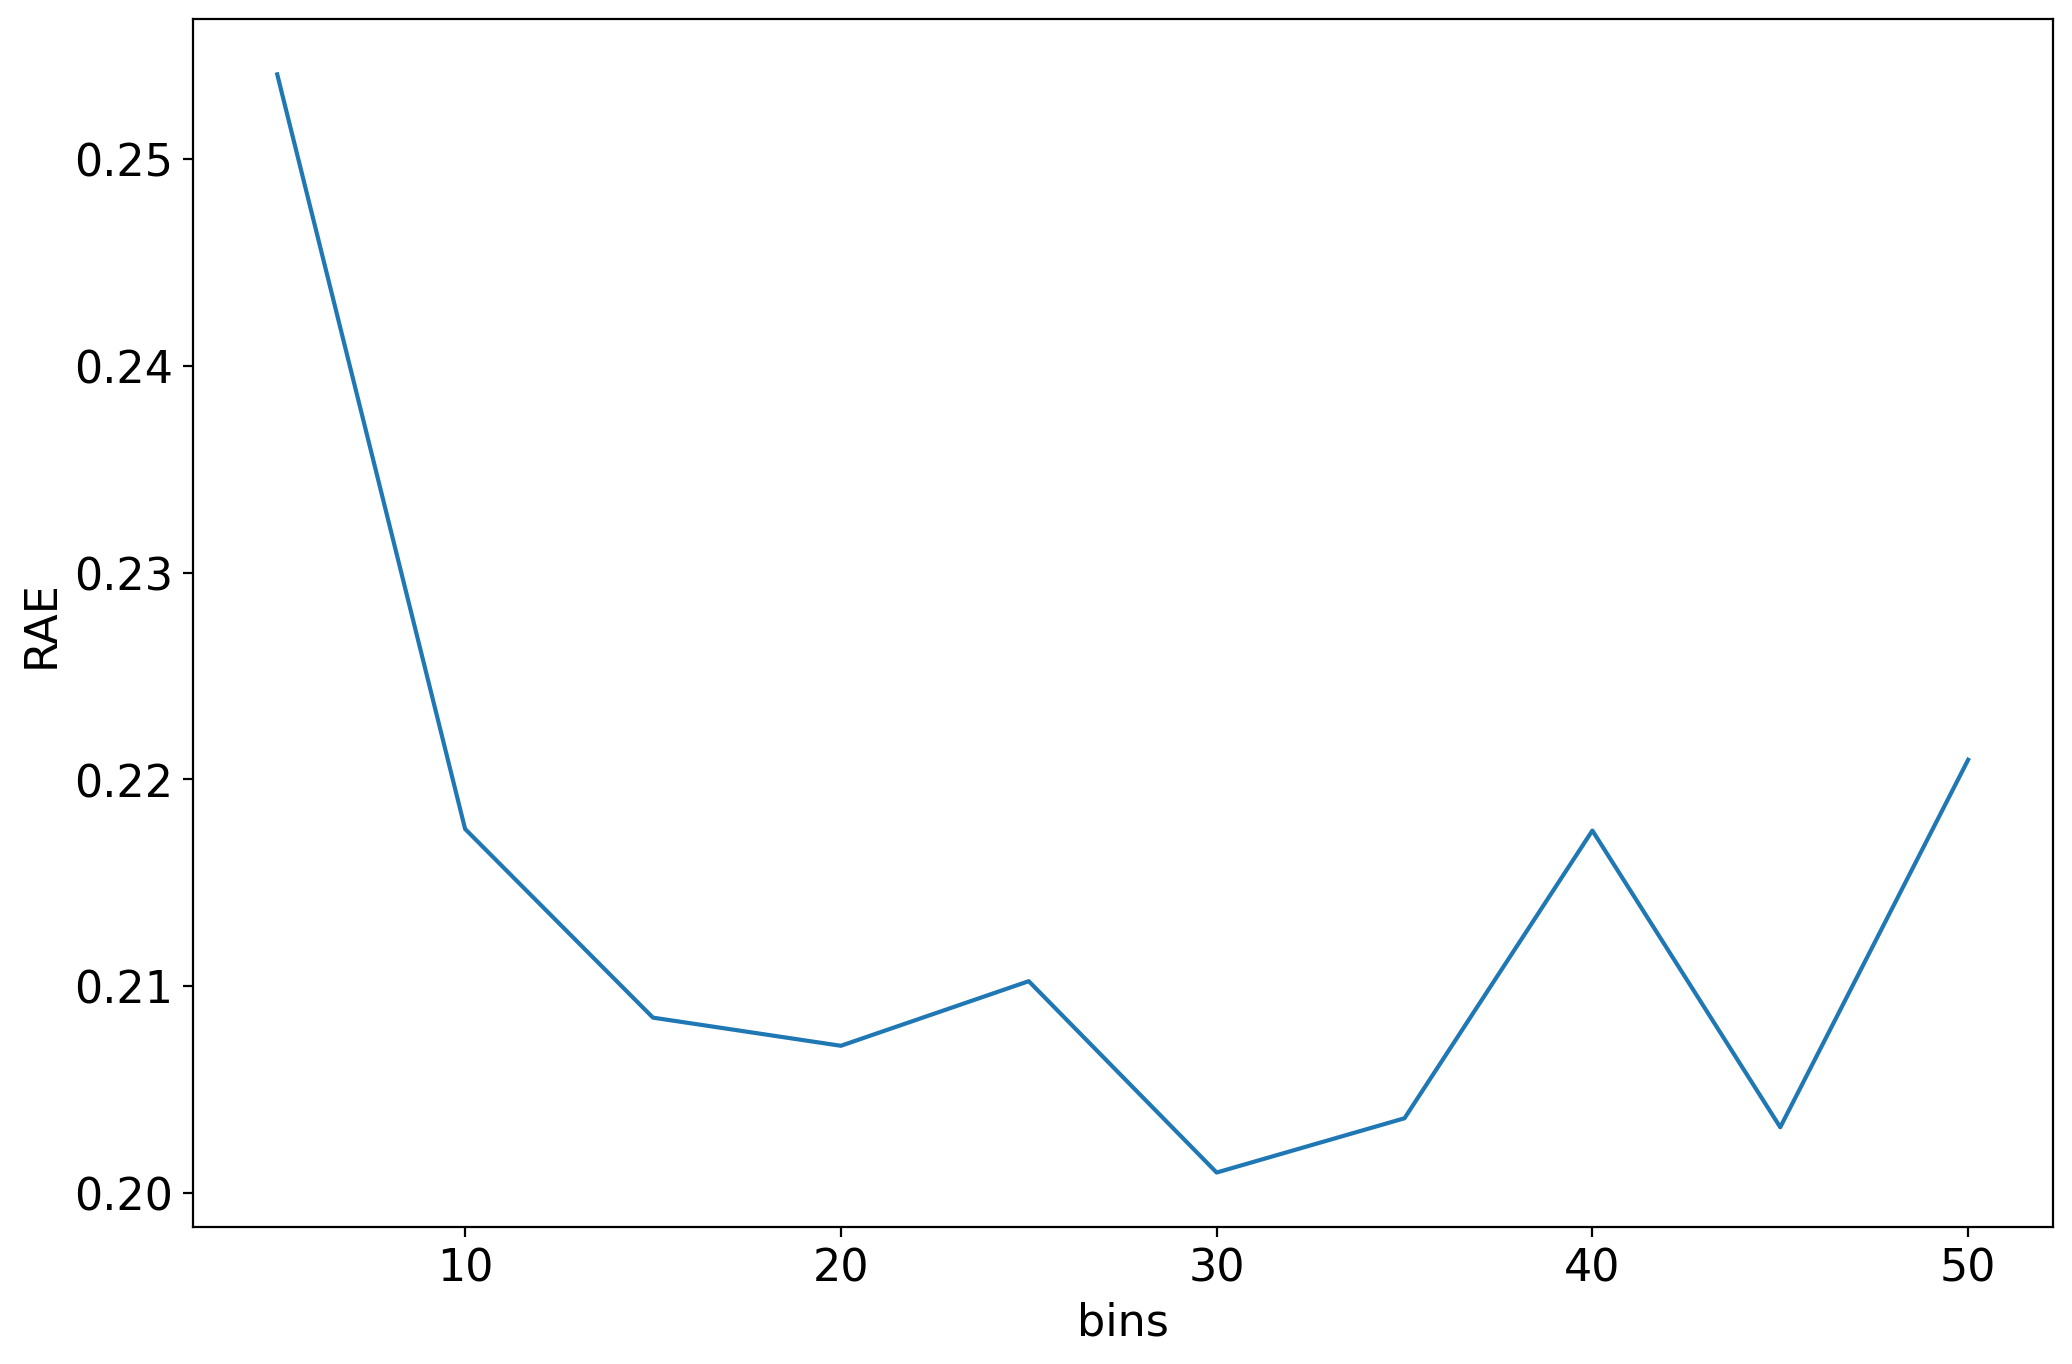

In [21]:
# HDy method
from sklearn.linear_model import LogisticRegression

print(train_x.shape)
print(train_y.shape)
print(train_y)

training_set = qp.data.base.LabelledCollection(train_x, train_y, classes_=[float(0), float(1)])
# model = qp.method.aggregative.HDy(RandomForestClassifier())
# model = qp.method.aggregative.HDy(LogisticRegression())
model = HDy(RandomForestClassifier())
model.fit(training_set)


bs_RAE = []
bs = model.bins

for b in range(10):
    print('bin', bs[b])
    df_test_p = pd.read_csv('./dev_prevalences.txt')
    test_p = df_test_p.to_numpy()[:,2]
    HDy_RAE_list = []

    for i in range(350):
#         print(i)
        df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
        test_sample_x = df_test_sample.to_numpy()
        e = 1/(2*test_sample_x.shape[0]) # smoothing factor

        estim_p = model.quantify(test_sample_x)[b]
    #     print(estim_p)
        smoothed_estim_p = (e+estim_p)/(e*2+1) # smoothing
        smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
        estim_p0 = 1-smoothed_estim_p
        test_p0 = 1-smoothed_test_p
#         print('smoothed_estim_p', smoothed_estim_p)
#         print('smoothed_test_p', smoothed_test_p)

        HDy_RAE = ((abs(smoothed_estim_p - smoothed_test_p) / smoothed_test_p)+
        (abs(estim_p0 - test_p0) / test_p0))/2
#         print(HDy_RAE)
        HDy_RAE_list.append(HDy_RAE)

    mean_HDy_RAE = np.mean(np.array(HDy_RAE_list))
    print('mean_RAE:', mean_HDy_RAE)
    bs_RAE.append(mean_HDy_RAE)


plt.xticks(list(np.linspace(10, 110, 11, dtype=int)))
plt.xlabel('bins')
plt.ylabel('RAE')
plt.plot(bs, np.array(bs_RAE))
plt.show()


    # estim_prevalence = model.quantify(dataset.test.instances)
    # print(estim_prevalence)

(5000, 300)
(5000,)
[1. 1. 0. ... 1. 1. 1.]
bin 5
mean_RAE: 0.2021017098002968
bin 10
mean_RAE: 0.18664464944495054
bin 15
mean_RAE: 0.1808844200573442
bin 20
mean_RAE: 0.19650265305848783
bin 25
mean_RAE: 0.19918324533809864
bin 30
mean_RAE: 0.19939252047095107
bin 35
mean_RAE: 0.21929144967067282
bin 40
mean_RAE: 0.20922278264549715
bin 45
mean_RAE: 0.20432570157397006
bin 50
mean_RAE: 0.22144305814404736


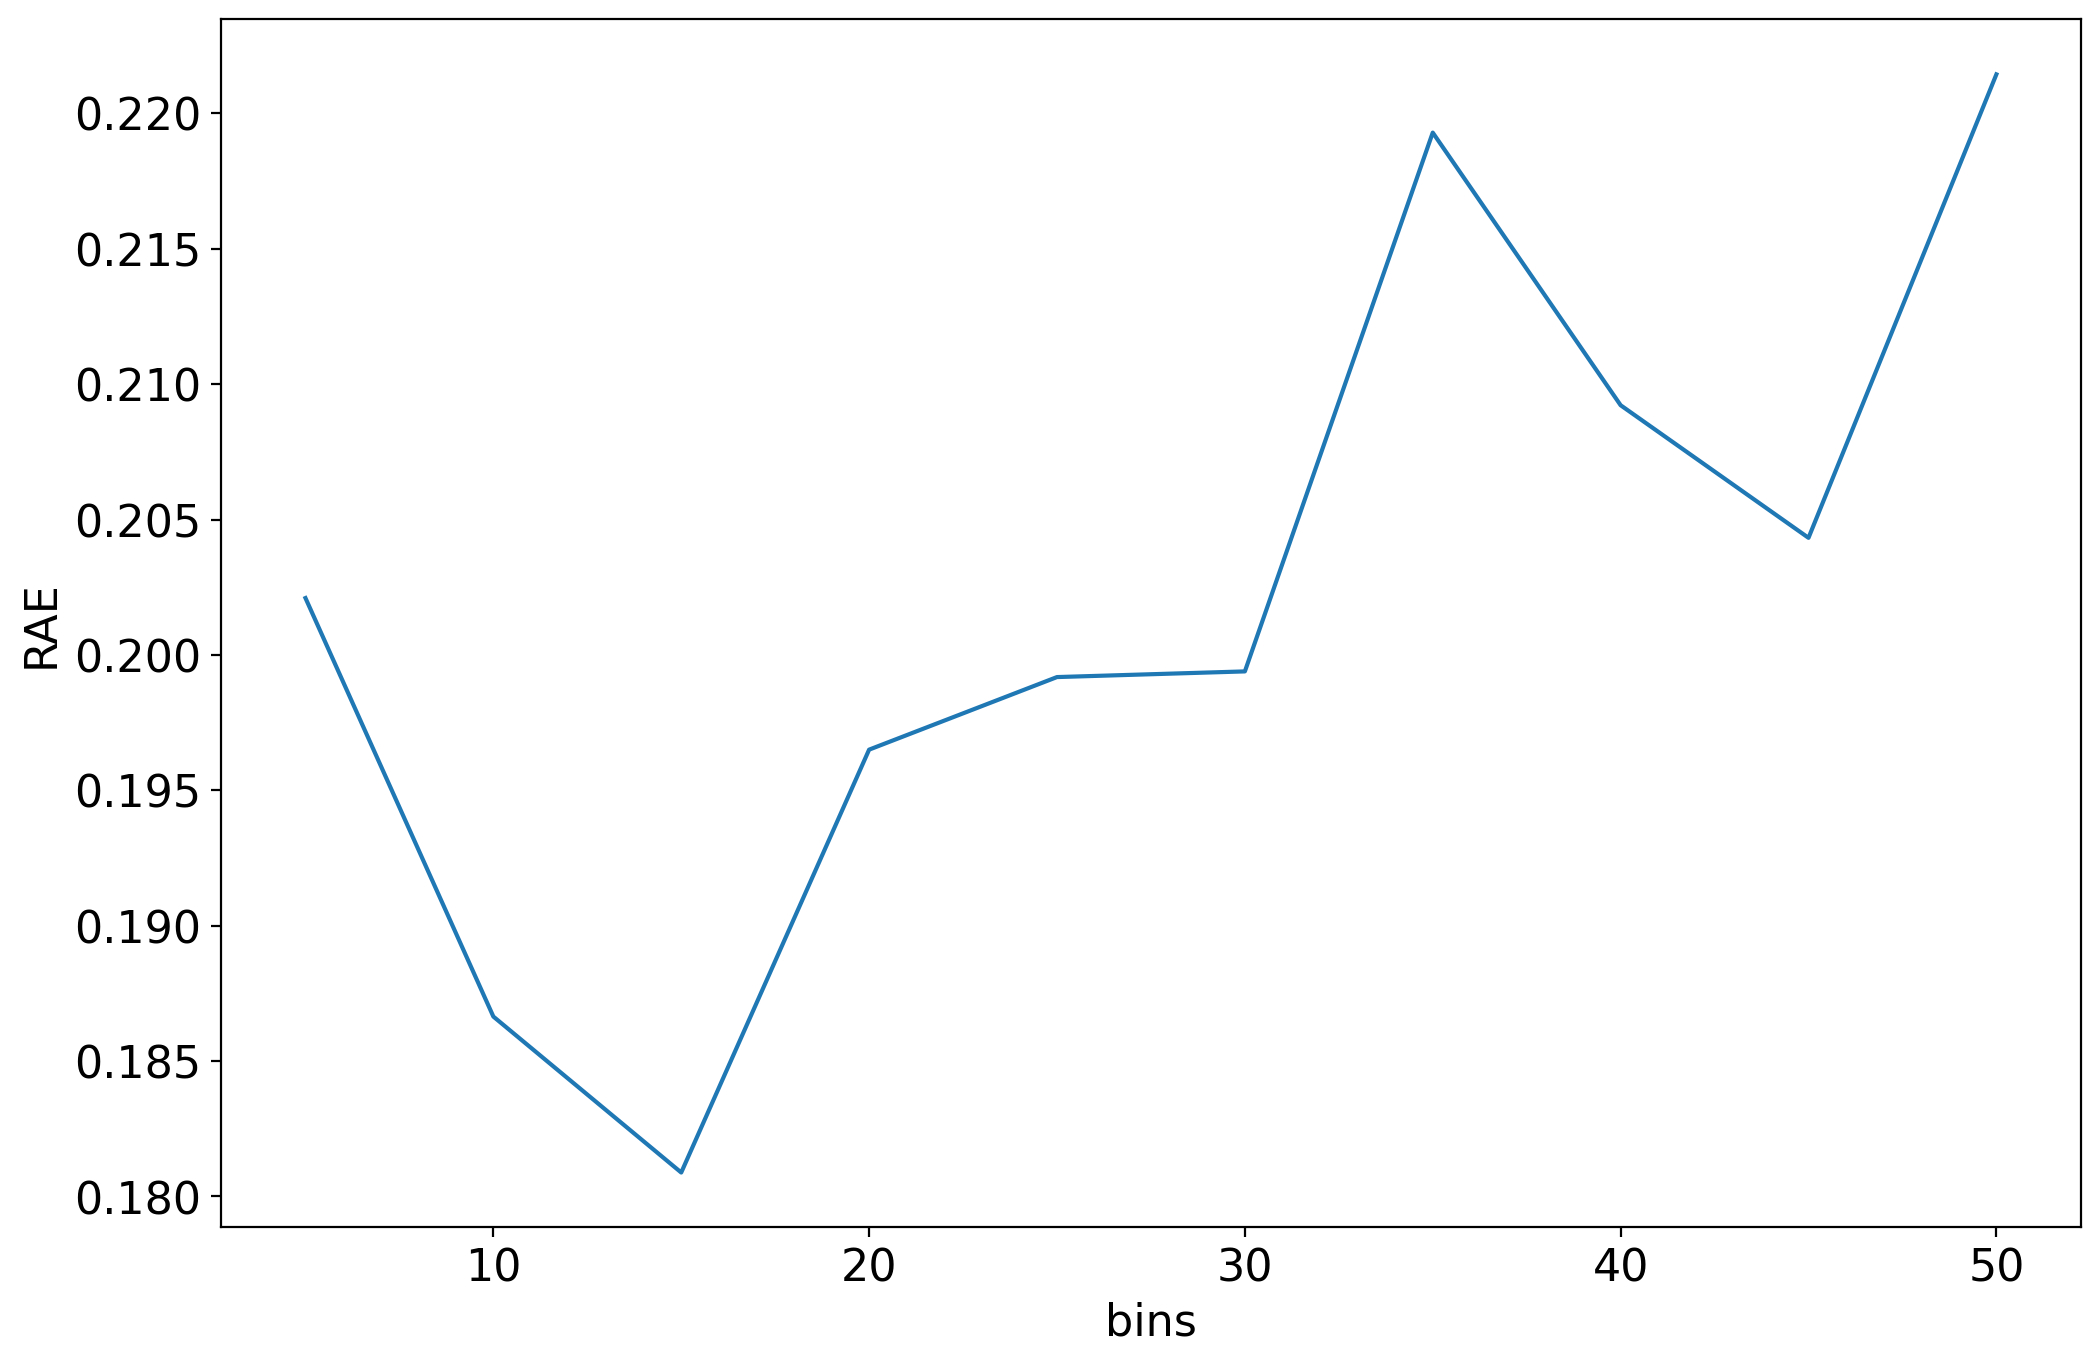

In [169]:
# TSy method
from sklearn.linear_model import LogisticRegression

print(train_x.shape)
print(train_y.shape)
print(train_y)

#------
# print(train_y[:3])
# train_x=[[1,1,1],[0,0,0]]
# train_y=[1,0]
#------

training_set = qp.data.base.LabelledCollection(train_x, train_y, classes_=[float(0), float(1)])
# model = qp.method.aggregative.HDy(RandomForestClassifier())
# model = qp.method.aggregative.HDy(LogisticRegression())
model = TSy(RandomForestClassifier())
model.fit(training_set)

bs_RAE = []
bs = model.bins

for b in range(10):
    print('bin', bs[b])
    df_test_p = pd.read_csv('./dev_prevalences.txt')
    test_p = df_test_p.to_numpy()[:,2]
    TSy_RAE_list = []

    for i in range(350):
    #         print(i)
        df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
        test_sample_x = df_test_sample.to_numpy()
        e = 1/(2*test_sample_x.shape[0]) # smoothing factor

        estim_p = model.quantify(test_sample_x)[b]
    #     print(estim_p)
        smoothed_estim_p = (e+estim_p)/(e*2+1) # smoothing
        smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
        estim_p0 = 1-smoothed_estim_p
        test_p0 = 1-smoothed_test_p
    #         print('smoothed_estim_p', smoothed_estim_p)
    #         print('smoothed_test_p', smoothed_test_p)

        TSy_RAE = ((abs(smoothed_estim_p - smoothed_test_p) / smoothed_test_p)+(abs(estim_p0 - test_p0) / test_p0))/2
    #         print(TSy_RAE)
        TSy_RAE_list.append(TSy_RAE)

    mean_TSy_RAE = np.mean(np.array(TSy_RAE_list))
    print('mean_RAE:', mean_TSy_RAE)
    bs_RAE.append(mean_TSy_RAE)

plt.xticks(list(np.linspace(10, 110, 11, dtype=int)))
plt.xlabel('bins')
plt.ylabel('RAE')
plt.plot(bs, np.array(bs_RAE))
plt.show()

    # estim_prevalence = model.quantify(dataset.test.instances)
    # print(estim_prevalence)

In [22]:
# JDy method
# from sklearn.linear_model import LogisticRegression

# print(train_x.shape)
# print(train_y.shape)
# print(train_y)

# #------
# # print(train_y[:3])
# # train_x=[[1,1,1],[0,0,0]]
# # train_y=[1,0]
# #------

# training_set = qp.data.base.LabelledCollection(train_x, train_y, classes_=[float(0), float(1)])
# # model = qp.method.aggregative.HDy(RandomForestClassifier())
# # model = qp.method.aggregative.HDy(LogisticRegression())
# model = JDy(RandomForestClassifier())
# model.fit(training_set)


# df_test_p = pd.read_csv('./dev_prevalences.txt')
# test_p = df_test_p.to_numpy()[:,2]
# JDy_RAE_list = []


# for i in range(1000):
#     print(i)
#     df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
#     test_sample_x = df_test_sample.to_numpy()
#     e = 1/(2*test_sample_x.shape[0]) # smoothing factor
    
#     estim_p = model.quantify(test_sample_x)[1]
#     smoothed_estim_p = (e+estim_p)/(e*2+1) # smoothing
#     smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
#     estim_p0 = 1-smoothed_estim_p
#     test_p0 = 1-smoothed_test_p
#     print('smoothed_estim_p', smoothed_estim_p)
#     print('smoothed_test_p', smoothed_test_p)

    
#     JDy_RAE = ((abs(smoothed_estim_p - smoothed_test_p) / smoothed_test_p)+
#     (abs(estim_p0 - test_p0) / test_p0))/2
#     print(JDy_RAE)
    
#     JDy_RAE_list.append(JDy_RAE)

# mean_JDy_RAE = np.mean(np.array(JDy_RAE_list))
# print('mean_RAE:', mean_JDy_RAE)


# # estim_prevalence = model.quantify(dataset.test.instances)
# # print(estim_prevalence)

In [111]:
# PSy method
from sklearn.linear_model import LogisticRegression

print(train_x.shape)
print(train_y.shape)
print(train_y)

#------
# print(train_y[:3])
# train_x=[[1,1,1],[0,0,0]]
# train_y=[1,0]
#------
psl = []
for epoch in range(10):
    training_set = qp.data.base.LabelledCollection(train_x, train_y, classes_=[float(0), float(1)])
    # model = qp.method.aggregative.HDy(RandomForestClassifier())
    # model = qp.method.aggregative.HDy(LogisticRegression())
    model = PSy(RandomForestClassifier())
    model.fit(training_set)


    df_test_p = pd.read_csv('./dev_prevalences.txt')
    test_p = df_test_p.to_numpy()[:,2]
    PSy_RAE_list = []

    for i in range(1000):
#         print(i)
        df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
        test_sample_x = df_test_sample.to_numpy()
        e = 1/(2*test_sample_x.shape[0]) # smoothing factor

        estim_p = model.quantify(test_sample_x)[1]
    #     print(estim_p)
        smoothed_estim_p = (e+estim_p)/(e*2+1) # smoothing
        smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
        estim_p0 = 1-smoothed_estim_p
        test_p0 = 1-smoothed_test_p
#         print('smoothed_estim_p', smoothed_estim_p)
#         print('smoothed_test_p', smoothed_test_p)

        PSy_RAE = ((abs(smoothed_estim_p - smoothed_test_p) / smoothed_test_p)+
        (abs(estim_p0 - test_p0) / test_p0))/2
#         print(PSy_RAE)
        PSy_RAE_list.append(PSy_RAE)

    mean_PSy_RAE = np.mean(np.array(PSy_RAE_list))
    print('mean_RAE:', mean_PSy_RAE)
    psl.append(mean_PSy_RAE)

print('psy average_performance:', np.mean(np.array(psl)))

    # estim_prevalence = model.quantify(dataset.test.instances)
    # print(estim_prevalence)

(5000, 300)
(5000,)
[1. 1. 0. ... 1. 1. 1.]
mean_RAE: 0.4836870566421346
mean_RAE: 0.3933919148635814
mean_RAE: 0.35936395350210376
mean_RAE: 0.32867549868794743
mean_RAE: 0.4030068825829517
mean_RAE: 0.448664212408784


KeyboardInterrupt: 

(5000, 300)
(5000,)
[1. 1. 0. ... 1. 1. 1.]
bin 10
mean_RAE: 0.19883164942881174
bin 20
mean_RAE: 0.19059365732002143
bin 30
mean_RAE: 0.17655960388367894
bin 40
mean_RAE: 0.1844648358474666
bin 50
mean_RAE: 0.18277980294420954
bin 60
mean_RAE: 0.18165350512118172
bin 70
mean_RAE: 0.18456602159891353
bin 80
mean_RAE: 0.18181137724621468
bin 90
mean_RAE: 0.18078413124946513
bin 100
mean_RAE: 0.1830861836995159
bin 110
mean_RAE: 0.18426091249544527


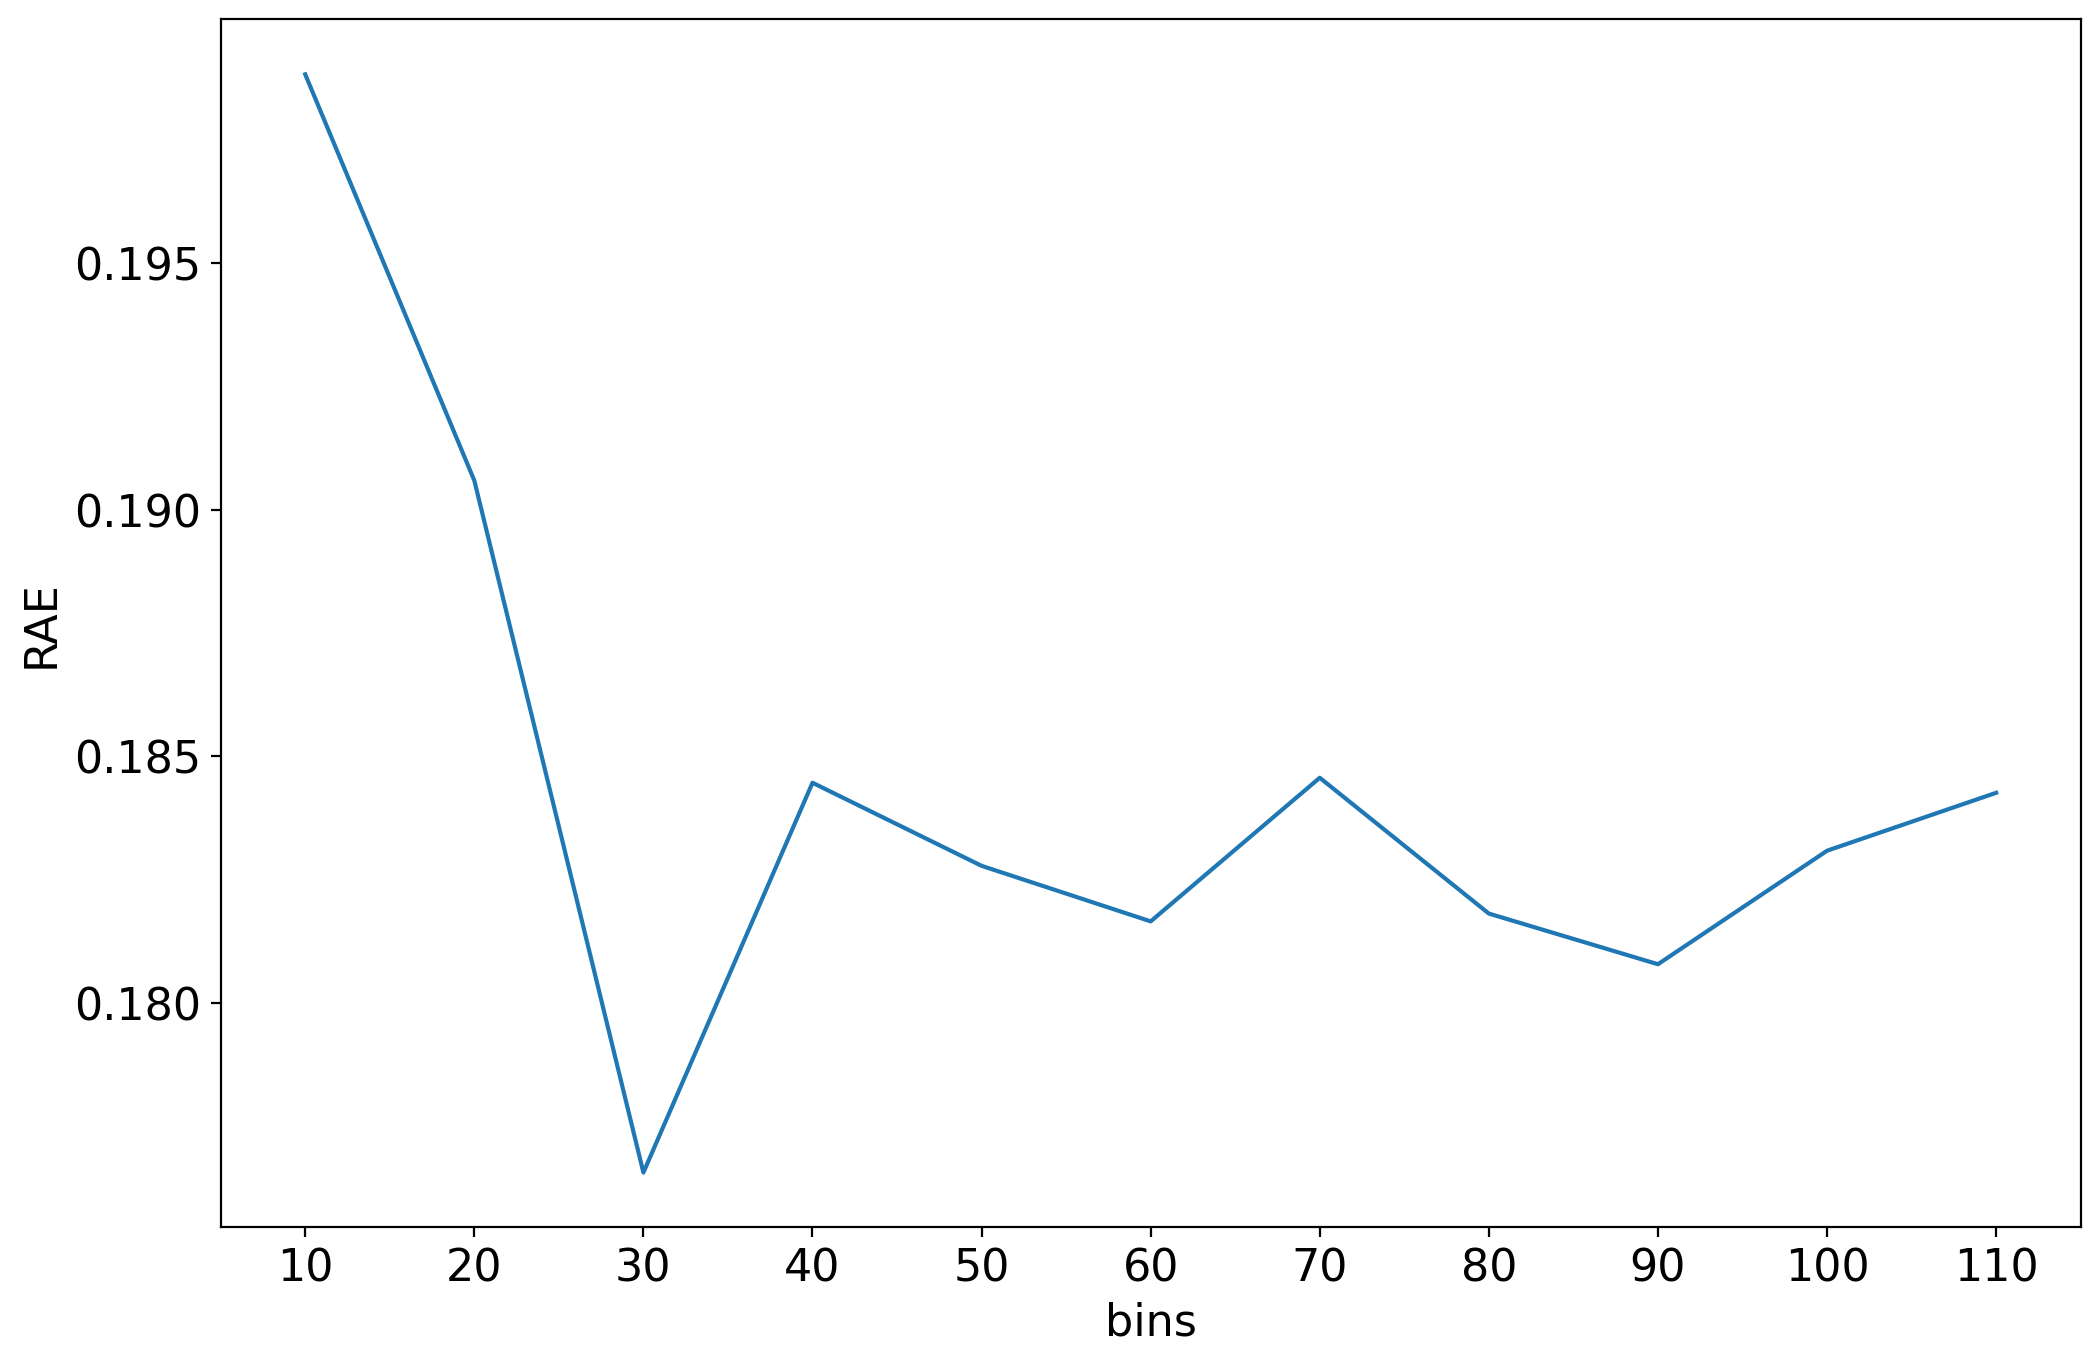

In [168]:
# ORDy method
from sklearn.linear_model import LogisticRegression

print(train_x.shape)
print(train_y.shape)
print(train_y)

#------
# print(train_y[:3])
# train_x=[[1,1,1],[0,0,0]]
# train_y=[1,0]
#------

training_set = qp.data.base.LabelledCollection(train_x, train_y, classes_=[float(0), float(1)])
# model = qp.method.aggregative.HDy(RandomForestClassifier())
# model = qp.method.aggregative.HDy(LogisticRegression())
model = ORDy(RandomForestClassifier())
model.fit(training_set)

bs_RAE = []
bs = np.linspace(10, 110, 11, dtype=int)
for b in range(11):
    print('bin', (b+1)*10)
    df_test_p = pd.read_csv('./dev_prevalences.txt')
    test_p = df_test_p.to_numpy()[:,2]
    ordy_RAE_list = []

    for i in range(350):
    #         print(i)
        df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
        test_sample_x = df_test_sample.to_numpy()
        e = 1/(2*test_sample_x.shape[0]) # smoothing factor

        estim_p = model.quantify(test_sample_x)[b]
    #     print(estim_p)
        smoothed_estim_p = (e+estim_p)/(e*2+1) # smoothing
        smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
        estim_p0 = 1-smoothed_estim_p
        test_p0 = 1-smoothed_test_p
    #         print('smoothed_estim_p', smoothed_estim_p)
    #         print('smoothed_test_p', smoothed_test_p)

        ordy_RAE = ((abs(smoothed_estim_p - smoothed_test_p) / smoothed_test_p)+
        (abs(estim_p0 - test_p0) / test_p0))/2
    #         print(ordy_RAE)
        ordy_RAE_list.append(ordy_RAE)

    mean_ordy_RAE = np.mean(np.array(ordy_RAE_list))
    print('mean_RAE:', mean_ordy_RAE)
    bs_RAE.append(mean_ordy_RAE)


plt.xticks(list(np.linspace(10, 110, 11, dtype=int)))
plt.xlabel('bins')
plt.ylabel('RAE')
plt.plot(bs, np.array(bs_RAE))
plt.show()

# print('ordy average_performance:', np.mean(np.array(ordl)))

    # estim_prevalence = model.quantify(dataset.test.instances)
    # print(estim_prevalence)

In [ ]:
# Naive Idea
df_test_p = pd.read_csv('./dev_prevalences.txt')
test_p = df_test_p.to_numpy()[:,2]
NI_RAE_list = []

for i in range(1000):
    print(i)
    histo = [[] for b in range(20)]
    df_test_sample = pd.read_csv('./dev_samples/%d.txt'%(i))
    test_sample_x = df_test_sample.to_numpy()
    e = 1/(2*test_sample_x.shape[0]) # smoothing factor
    
    scale = rf_classifier.predict_proba(test_sample_x)[:, 0]
    y = rf_classifier.predict(test_sample_x)
    print(scale)
    print(y)
    slots = 100*scale//5
    print(slots)
    for j in range(test_sample_x.shape[0]):
        if int(slots[j]):
            histo[int(slots[j])-1].append(scale[j])
        else:
            histo[int(slots[j])].append(scale[j])

    total_pos = 0
    for b in range(20):
        histo[b].sort(reverse=True)
        percen_pos = (b*5+2.5)/100
        num_pos = int(len(histo[b])*percen_pos)
        total_pos = total_pos + len(histo[b][:num_pos])
    
    NI_estim_p = total_pos/test_sample_x.shape[0]
    
    smoothed_NI_estim_p = (e+NI_estim_p)/(e*2+1) # smoothing
    NI_estim_p0 = 1-smoothed_NI_estim_p
    smoothed_test_p = (e+test_p[i])/(e*2+1) # smoothing
    test_p0 = 1-smoothed_test_p
    
    
    print('smoothed_estim_p', smoothed_NI_estim_p)
    print('smoothed_test_p', smoothed_test_p)
    
    NI_RAE = ((abs(smoothed_NI_estim_p - smoothed_test_p) / smoothed_test_p)+
    (abs(NI_estim_p0 - test_p0) / test_p0))/2
    print(NI_RAE)
    NI_RAE_list.append(NI_RAE)

mean_NI_RAE = np.mean(np.array(NI_RAE_list))
print('mean_RAE:', mean_NI_RAE)